In [13]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

city_df =  city_data.drop_duplicates('city', keep='first')

# Combine the data into a single dataset
city_ride_data = city_df.merge(ride_data, on='city')
city_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [16]:
per_city = city_ride_data.groupby('city')
avg_fare_city = per_city.mean()['fare']
ride_city = per_city['ride_id'].count()
driver_city = per_city.mean()['driver_count']

#1st try
cleaned_df = city_df.set_index('city')['type']

In [20]:
city_info = pd.DataFrame({
    "Number of Rides": ride_city,
    "Average Fare": avg_fare_city,
    "Number of Drivers": driver_city,
    "Type of City": cleaned_df
})
city_info.sort_values('Number of Drivers', ascending = False).head()

,Number of Rides,Average Fare,Number of Drivers,Type of City
West Samuelburgh,25,21.767600,73.0,Urban
South Michelleport,31,24.451613,72.0,Urban
West Anthony,30,24.736667,70.0,Urban
Liumouth,33,26.150000,69.0,Urban
Port Angela,19,23.836842,67.0,Urban


In [88]:
urban_data = city_info[city_info['Type of City']=="Urban"]

In [89]:
suburban_data = city_info[city_info['Type of City']=="Suburban"]

In [90]:
rural_data = city_info[city_info['Type of City']=="Rural"]

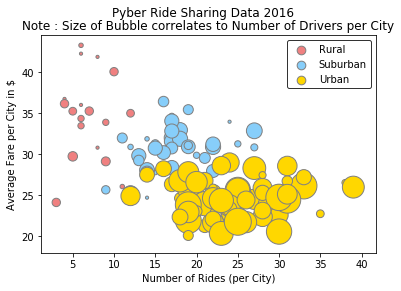

In [67]:
#Plot
colors = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
city_color = {'Urban': colors['Gold'], 'Suburban': colors['Light Sky Blue'], 'Rural': colors['Light Coral']}

# Obtain the x and y coordinates for each of the three city types

plt.suptitle('Pyber Ride Sharing Data 2016')

# scatter plots for each city type
plt.scatter(rural_data['Number of Rides'], rural_data['Average Fare'], \
            s = rural_data['Number of Drivers']*10, color = city_color['Rural'], \
            edgecolor = 'grey', label = 'Rural', alpha = 1)
plt.scatter(suburban_data['Number of Rides'], suburban_data['Average Fare'], \
            s = suburban_data['Number of Drivers']*10, color = city_color['Suburban'],\
            edgecolor = 'grey', label = 'Suburban', alpha = 1)
plt.scatter(urban_data['Number of Rides'], urban_data['Average Fare'], \
            s = urban_data['Number of Drivers']*10, color = city_color['Urban'], \
            edgecolor = 'grey', label = 'Urban', alpha = 1)

#print scatter plot
plt.title('Note : Size of Bubble correlates to Number of Drivers per City')
plt.xlabel('Number of Rides (per City)')
plt.ylabel('Average Fare per City in $')

#legend
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()

In [66]:
plt.savefig('Pyber Ride Sharing.png')

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

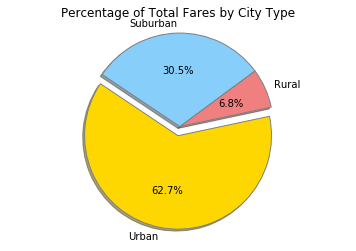

<Figure size 432x288 with 0 Axes>

In [96]:
# Calculate Type Percents
by_type = city_ride_data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
total_fare = by_type.sum()['fare']
# Build Pie Chart
labels = total_fare.index
colors = [city_color[n] for n in labels]
explode = [0 , 0, .1]
plt.pie(total_fare, startangle = 12, colors = colors, explode = explode, \
        labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'grey'})

plt.title('Percentage of Total Fares by City Type')
plt.axis('equal')
plt.show()
# Save Figure
plt.savefig('Percentage of Total Fares by City Type')


## Total Rides by City Type

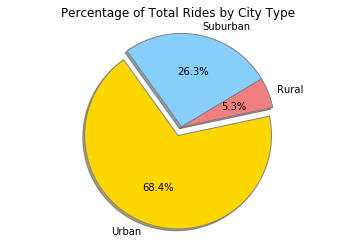

<Figure size 432x288 with 0 Axes>

In [97]:
# Calculate Ride Percents
total_rides = by_type.count()['ride_id']

labels = total_rides.index
plt.pie(total_rides, startangle = 12, explode = explode, colors = colors, \
        labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'grey'})
plt.title('Percentage of Total Rides by City Type')
plt.axis('equal')
plt.show()
plt.savefig('Percentage of Total Rides by City Type')

## Total Drivers by City Type

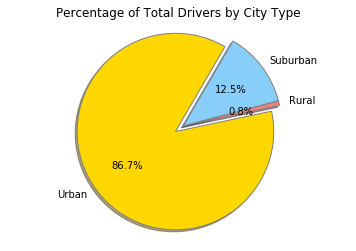

<Figure size 432x288 with 0 Axes>

In [65]:
# Calculate Driver Percents
total_drivers = by_type.sum()['driver_count']

labels = total_drivers.index
plt.pie(total_drivers, startangle = 12, explode = explode, colors = colors, \
        labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'grey'})
plt.title('Percentage of Total Drivers by City Type')
plt.axis('equal')
plt.show()
plt.savefig('Percentage of Total Drivers by City Type')